# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [112]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

In [113]:
cities

['whitehorse',
 'waitangi',
 'chibougamau',
 'ishigaki',
 'pisco',
 'puerto san carlos',
 'parauapebas',
 'stanley',
 'adamstown',
 'blackmans bay',
 'port-aux-francais',
 'grytviken',
 'hadithah',
 'xining',
 'iqaluit',
 'brookings',
 'port elizabeth',
 'mount pearl',
 'ormara',
 'bathsheba',
 'nyurba',
 'mount isa',
 'puerto baquerizo moreno',
 'longyearbyen',
 'lincoln',
 'sao joao da barra',
 'college',
 'ushuaia',
 'tuy hoa',
 'teguise',
 'port mathurin',
 'martin',
 'lebu',
 'holualoa',
 'edinburgh of the seven seas',
 'tazovsky',
 'rybinsk',
 'copiapo',
 'namtsy',
 'chipinge',
 'kingston',
 'touros',
 'yellowknife',
 'maralal',
 'ancud',
 'taiohae',
 'jinka',
 'bredasdorp',
 'flin flon',
 'trongsa',
 'warmbad',
 'kharkhorin',
 'west side highway',
 'levuka',
 'vilhena',
 "ust'-barguzin",
 'puerto ayora',
 'tevriz',
 "mil'kovo",
 'west island',
 'rengasdengklok',
 'puerto natales',
 'viedma',
 'thompson',
 'tucuma',
 'marka',
 'wailua homesteads',
 'atafu village',
 'constantia',

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [114]:
rows = []

# loop cities
for city in cities[0:30]:
    
    try:

        # geolocation
        geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}"
        response = requests.get(geo_url)

        if (response.status_code == 200):
            # do work
            geo_data = response.json()

            # get lat, lon, country, name
            if len(geo_data) > 0:
                lat = geo_data[0].get("lat", np.nan)
                lon = geo_data[0].get("lon", np.nan)
                country = geo_data[0].get("country", None)
                name = geo_data[0].get("name", None)

        #         print(f"{city} is located at {lat},{lon}")

                if (lat and lon):
                    # weather
                    weather_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial"
                    response2 = requests.get(weather_url)

                    if (response2.status_code == 200):
                        weather_data = response2.json()

                        # extract data
                        temp = weather_data.get("main", {}).get("temp", np.nan)
                        pressure = weather_data.get("main", {}).get("pressure", np.nan)
                        humidity = weather_data.get("main", {}).get("humidity", np.nan)
                        wind_speed = weather_data.get("wind", {}).get("speed", np.nan)
                        cloudiness = weather_data.get("clouds", {}).get("all", np.nan)
                        date = wind_speed = weather_data.get("dt", np.nan)

                        # build row
                        row = {"city": name,
                               "country": country,
                               "latitude": lat,
                               "longitude": lon,
                               "temperature": temp,
                               "pressure": pressure,
                               "humidity": humidity,
                               "wind_speed": wind_speed,
                              "cloudiness": cloudiness,
                              "date": date}

            #             print(row)
                        rows.append(row)

                    else:
                        print(f"Getting Weather Data failed with status code: {response2.status_code}. More info below:")
                        print(weather_data)
                else:
                    print("failed to extract lat and lon from response")
                    print(geo_data)
            else:
                print(f"did not find any geolocation data for city: {city}")
        else:
            print(f"Getting geolocation data failed with status code: {response.status_code}. More info below:")
            print(geo_data)
    except Exception as e:
        print(f"Something went terribly wrong for {city}")
        print(e)
    
    # sleep 
    print(f"{city} was processed successfully.")
    time.sleep(1)

whitehorse was processed successfully.
waitangi was processed successfully.
chibougamau was processed successfully.
ishigaki was processed successfully.
pisco was processed successfully.
puerto san carlos was processed successfully.
parauapebas was processed successfully.
stanley was processed successfully.
adamstown was processed successfully.
blackmans bay was processed successfully.
port-aux-francais was processed successfully.
grytviken was processed successfully.
hadithah was processed successfully.
xining was processed successfully.
iqaluit was processed successfully.
brookings was processed successfully.
port elizabeth was processed successfully.
mount pearl was processed successfully.
ormara was processed successfully.
bathsheba was processed successfully.
nyurba was processed successfully.
mount isa was processed successfully.
puerto baquerizo moreno was processed successfully.
longyearbyen was processed successfully.
lincoln was processed successfully.
sao joao da barra was p

In [115]:
 df1 = pd.DataFrame(rows)
df1

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,Whitehorse,CA,60.721571,-135.054932,51.75,1014,59,1683943142,75,1683943142
1,Waitangi,NZ,-35.270465,174.080459,67.55,1027,76,1683943144,73,1683943144
2,Chibougamau,CA,49.913741,-74.371395,42.57,1017,65,1683943145,100,1683943145
3,Ishigaki,JP,24.338283,124.157757,79.03,1013,73,1683943146,75,1683943146
4,Pisco,PE,-13.709981,-76.202979,69.69,1011,78,1683943148,75,1683943148
5,Puerto San Carlos,BO,-12.660754,-63.550020,75.31,1015,77,1683943149,95,1683943149
6,Parauapebas,BR,-6.069685,-49.890328,72.23,1015,96,1683943151,99,1683943151
7,Stanley,FK,-51.695057,-57.849169,41.34,1004,67,1683942970,100,1683942970
8,Adamstown,PN,-25.066667,-130.100205,72.90,1021,58,1683943154,100,1683943154
9,Blackmans Bay,AU,-43.004684,147.317986,57.87,1027,62,1683942997,30,1683942997


In [116]:
# Show Record Count
df1.count()

city           30
country        30
latitude       30
longitude      30
temperature    30
pressure       30
humidity       30
wind_speed     30
cloudiness     30
date           30
dtype: int64

In [117]:
# Display sample data
df1.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,Whitehorse,CA,60.721571,-135.054932,51.75,1014,59,1683943142,75,1683943142
1,Waitangi,NZ,-35.270465,174.080459,67.55,1027,76,1683943144,73,1683943144
2,Chibougamau,CA,49.913741,-74.371395,42.57,1017,65,1683943145,100,1683943145
3,Ishigaki,JP,24.338283,124.157757,79.03,1013,73,1683943146,75,1683943146
4,Pisco,PE,-13.709981,-76.202979,69.69,1011,78,1683943148,75,1683943148


In [118]:
# Export the City_Data into a csv
df1.to_csv("../output_data/cities.csv", index_label="City_ID")

In [119]:
# Read saved data
df1 = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
df1.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
City_ID,,,,,,,,,,
0,Whitehorse,CA,60.721571,-135.054932,51.75,1014,59,1683943142,75,1683943142
1,Waitangi,NZ,-35.270465,174.080459,67.55,1027,76,1683943144,73,1683943144
2,Chibougamau,CA,49.913741,-74.371395,42.57,1017,65,1683943145,100,1683943145
3,Ishigaki,JP,24.338283,124.157757,79.03,1013,73,1683943146,75,1683943146
4,Pisco,PE,-13.709981,-76.202979,69.69,1011,78,1683943148,75,1683943148


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

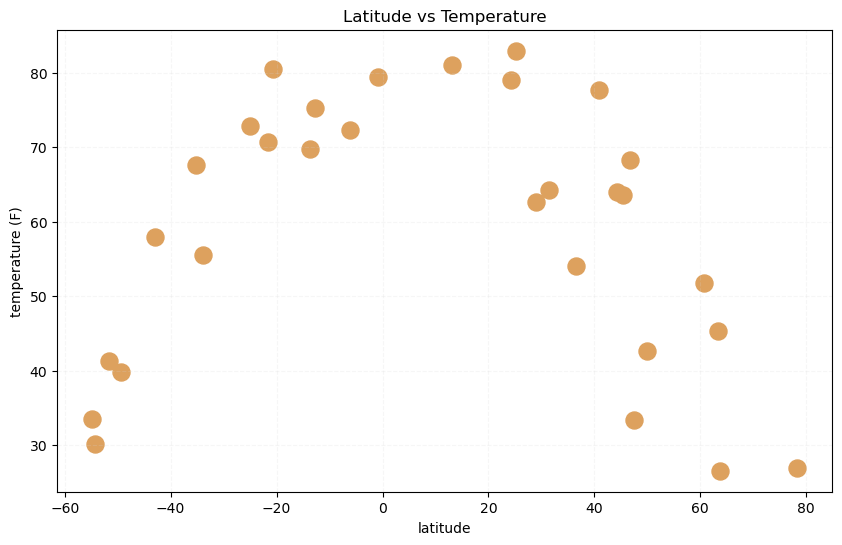

<Figure size 640x480 with 0 Axes>

In [120]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
# plt.show()

plt.figure(figsize=(10,6))

plt.scatter(df1.latitude, df1.temperature, color="#dda15e", s=150)
plt.xlabel("latitude")
plt.ylabel("temperature (F)")
plt.title("Latitude vs Temperature")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig1.png")

#### Latitude Vs. Humidity

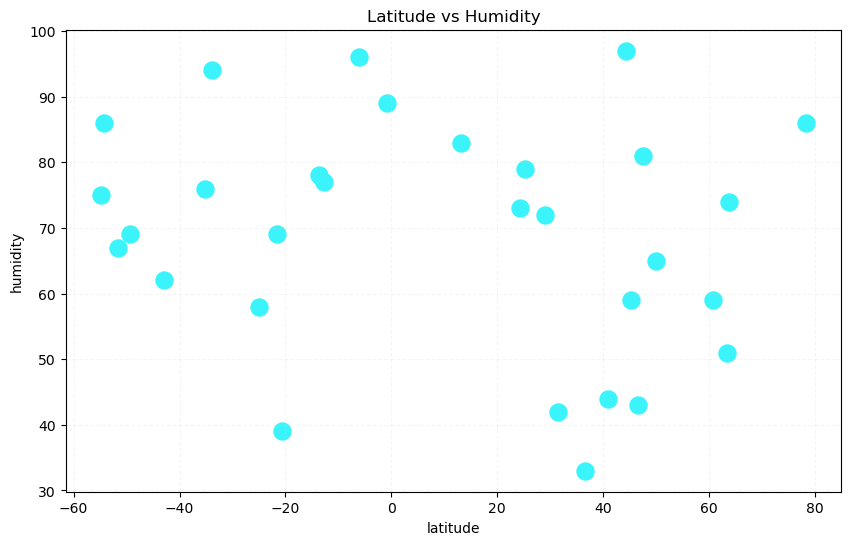

<Figure size 640x480 with 0 Axes>

In [121]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig2.png")

# # Show plot
# plt.show()

plt.figure(figsize=(10,6))

plt.scatter(df1.latitude, df1.humidity, color="#3BF4FB", s=150)
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.title("Latitude vs Humidity")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# # Save the figure
plt.savefig("../output_data/Fig2.png")

#### Latitude Vs. Cloudiness

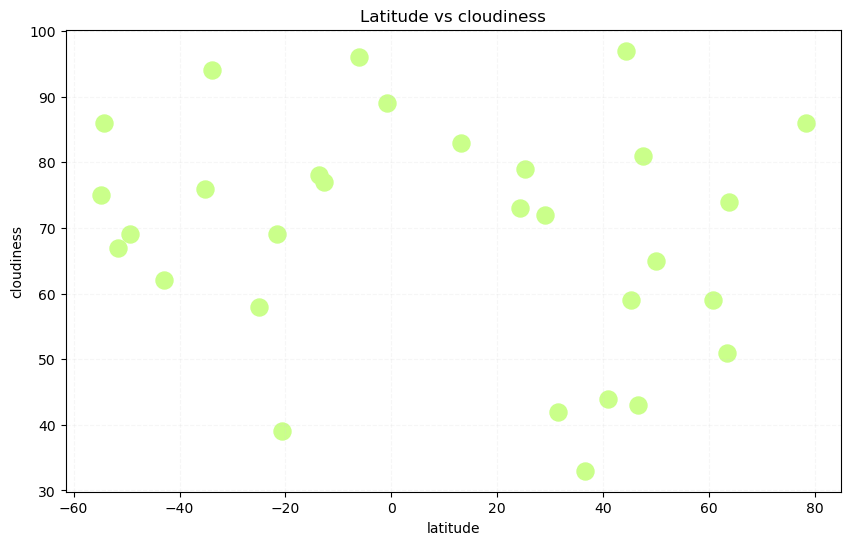

<Figure size 640x480 with 0 Axes>

In [122]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig3.png")

# # Show plot
# plt.show()

plt.figure(figsize=(10,6))

plt.scatter(df1.latitude, df1.humidity, color="#CAFF8A", s=150)
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.title("Latitude vs cloudiness")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# # # Save the figure
plt.savefig("../output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

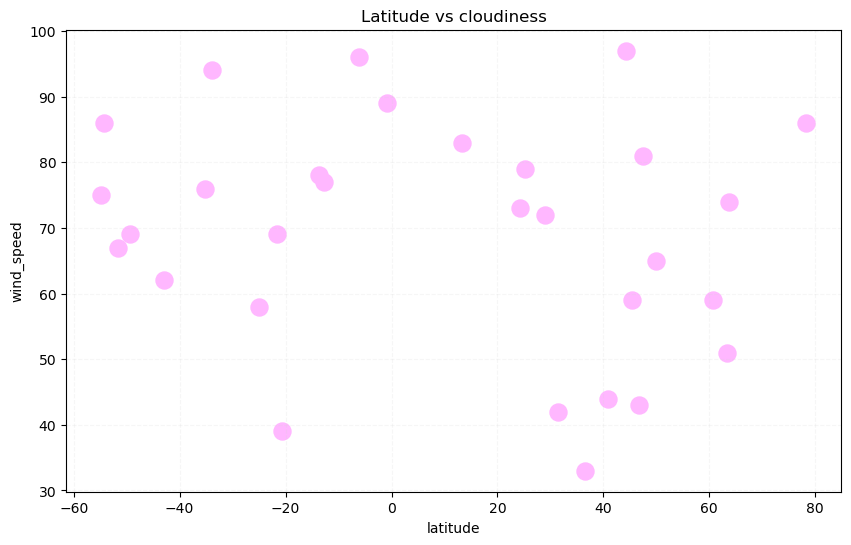

<Figure size 640x480 with 0 Axes>

In [123]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig4.png")

# # Show plot
# plt.show()

plt.figure(figsize=(10,6))

plt.scatter(df1.latitude, df1.humidity, color="#FFB7FF", s=150)
plt.xlabel("latitude")
plt.ylabel("wind_speed")
plt.title("Latitude vs cloudiness")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# # # Save the figure
plt.savefig("../output_data/Fig4.png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [124]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [125]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df1.loc[df1.latitude >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,Whitehorse,CA,60.721571,-135.054932,51.75,1014,59,1683943142,75,1683943142
1,Chibougamau,CA,49.913741,-74.371395,42.57,1017,65,1683943145,100,1683943145
2,Ishigaki,JP,24.338283,124.157757,79.03,1013,73,1683943146,75,1683943146
3,Al Hadithah,SA,31.454449,37.158921,64.26,1015,42,1683943159,0,1683943159
4,Xining,CN,36.617331,101.776198,54.05,1019,33,1683943161,1,1683943161


In [126]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df1.loc[df1.latitude < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,Waitangi,NZ,-35.270465,174.080459,67.55,1027,76,1683943144,73,1683943144
1,Pisco,PE,-13.709981,-76.202979,69.69,1011,78,1683943148,75,1683943148
2,Puerto San Carlos,BO,-12.660754,-63.550020,75.31,1015,77,1683943149,95,1683943149
3,Parauapebas,BR,-6.069685,-49.890328,72.23,1015,96,1683943151,99,1683943151
4,Stanley,FK,-51.695057,-57.849169,41.34,1004,67,1683942970,100,1683942970


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.676814367045258


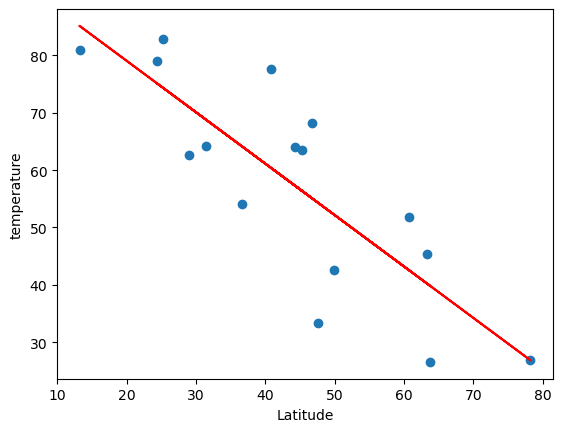

In [127]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["temperature"]
plot_linear_regression(x_values, y_values, "temperature",(6,-10))

In [128]:
# RElationship of linear regression Temp vs Lattitude Northern hemisphere 
# The regression reflects the hight the latitude coordinate the tempature will rise 

The r-value is: 0.8223916437334567


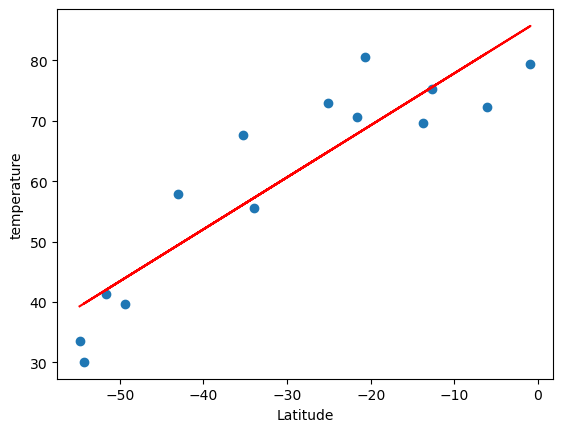

In [129]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["temperature"]
plot_linear_regression(x_values, y_values, "temperature",(6,-10))

In [130]:
# RElationship of linear regression Temp vs Lattitude Southern hemisphere 
# The regression reflects the lower the latitude coordinate the tempature will fall

In [131]:
X = northern_hemi_df["latitude"]
y = northern_hemi_df["temperature"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     29.32
Date:                Fri, 12 May 2023   Prob (F-statistic):           9.12e-05
Time:                        20:59:48   Log-Likelihood:                -59.988
No. Observations:                  16   AIC:                             124.0
Df Residuals:                      14   BIC:                             125.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.0109      7.756     12.508      0.0

C:\Users\jenni\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [132]:
# import stats library 
import statsmodels.api as sm

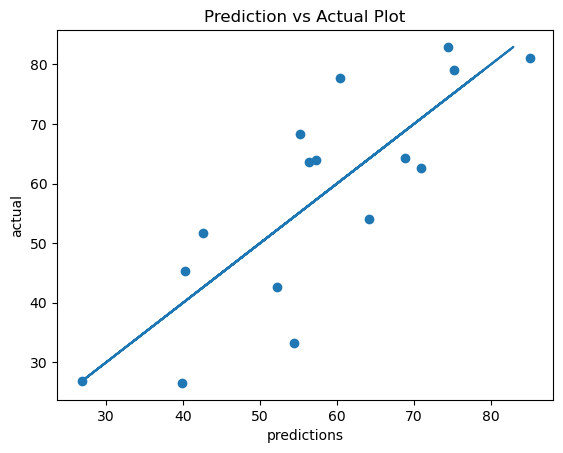

In [133]:
plt.scatter(predictions, y)
plt.xlabel("predictions")
plt.ylabel("actual")
plt.title("Prediction vs Actual Plot")
plt.plot(y, y)
plt.show()

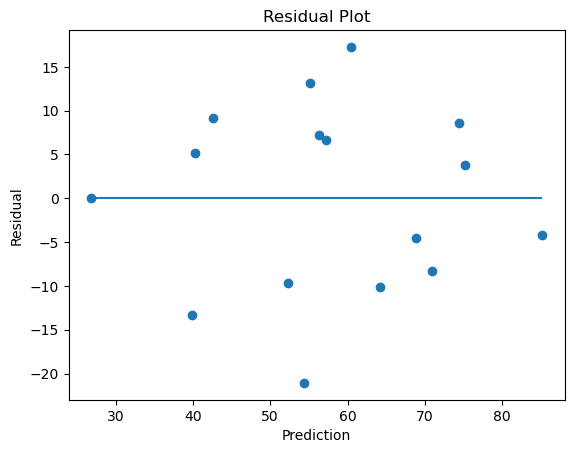

In [134]:
residuals = y - predictions

plt.scatter(predictions, residuals)
plt.hlines(0, min(predictions), max(predictions))
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [135]:
#The lower the latitude coordinate in the southern hemisphere the less humidity and in the northern hemisphere as the latitude 
#coordinate increases the humidity

The r-value is: 0.03013147782132481


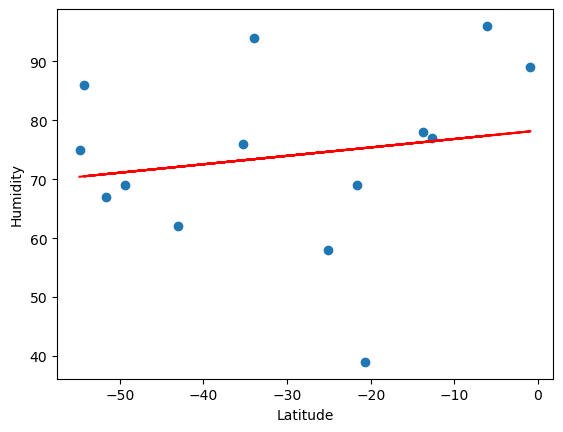

In [136]:
# southern Hemisphere 
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,-10))

The r-value is: 6.665794068628188e-05


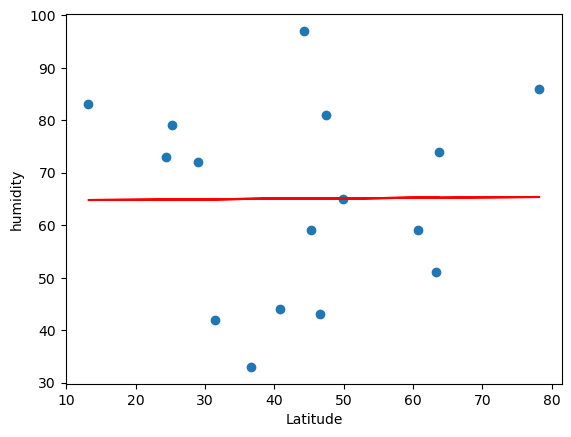

In [137]:
#Northern Hemisphere 
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["humidity"]
plot_linear_regression(x_values, y_values, "humidity",(6,-10))

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0021859852759340075


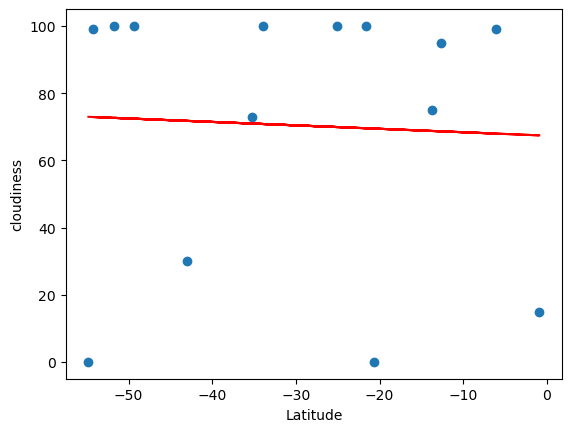

In [138]:
# Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["cloudiness"]
plot_linear_regression(x_values, y_values, "cloudiness",(6,-10))

The r-value is: 0.3493425461320207


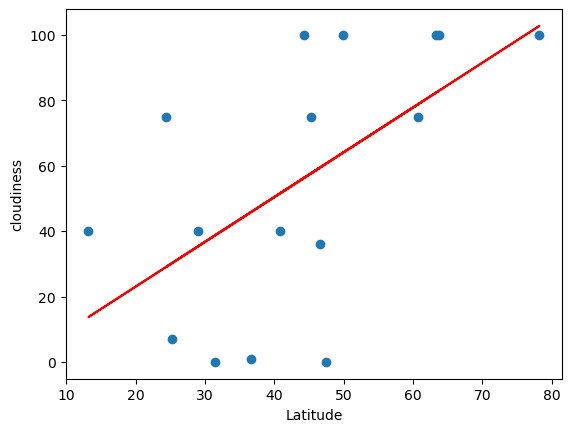

In [139]:
# Northern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["cloudiness"]
plot_linear_regression(x_values, y_values, "cloudiness",(6,-10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [140]:
# as the latitude in the northern hemisphere increases the cloudiness decreases 
# in the southern hemisphere as the latitude decreases the cloudiness increases 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2960205993630376


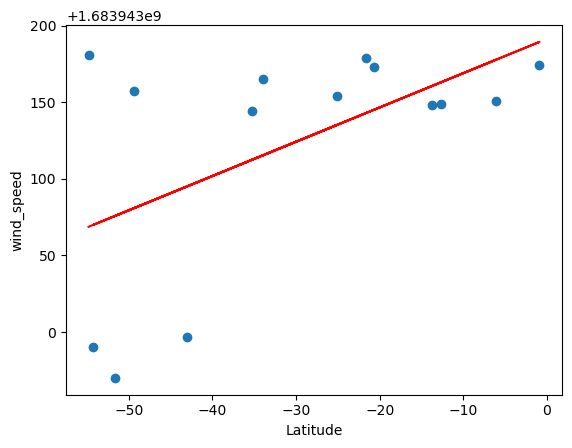

In [141]:
# Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["wind_speed"]
plot_linear_regression(x_values, y_values, "wind_speed",(6,-10))

The r-value is: 0.0008417547849982027


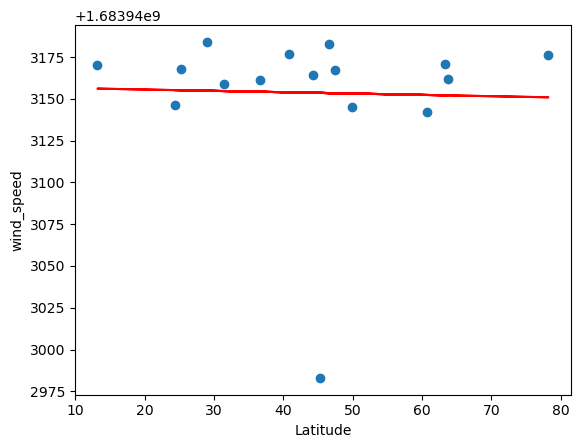

In [142]:
# Northhern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["wind_speed"]
plot_linear_regression(x_values, y_values, "wind_speed",(6,-10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [143]:
# in the northernhemisphere as the latitude coordinate increases the windspeed decreases 
# in the Southernhemisphere as the latitude coordinate decreases the windspeed increases 